In [1]:
import json
import pandas as pd
data = []
rows_list = []
max_number_of_books = 50000
books = pd.DataFrame(data = data, columns=[
    'text_reviews_count', 'average_rating',
    'similar_books', 'authors', 'publisher',
    'num_pages', 'publication_year','book_id',
    'ratings_count', 'title'
])
count = 0
with open('goodreads_books.json',"r") as jsonfile:
    while True:
        # if count >= max_number_of_books:
        #     break
        data = jsonfile.readline()
        if not data:
            break
        data = json.loads(data)
 
        try:
            text_reviews_count = int(data['text_reviews_count'])
            average_rating = float(data['average_rating'])
            publication_year = int(data['publication_year'])
            num_pages = int(data['num_pages'])
            ratings_count = int(data['ratings_count'])
            book_id = int(data['book_id'])
        except Exception:
            continue

        dict1 = {
        'text_reviews_count':text_reviews_count,
        'average_rating': average_rating,
        'similar_books': data['similar_books'],
        'authors': data['authors'],
        'publisher': data['publisher'],
        'num_pages': num_pages,
        'publication_year': publication_year,
        'book_id': book_id,
        'ratings_count': ratings_count,
        'title': data['title']
        }
        count +=1
        rows_list.append(dict1)

books = pd.DataFrame(rows_list)
print(books.head())

   text_reviews_count  average_rating  \
0                   1            4.00   
1                   7            4.03   
2                3282            3.49   
3                   7            4.13   
4                   6            4.22   

                                       similar_books  \
0                                                 []   
1  [19997, 828466, 1569323, 425389, 1176674, 2627...   
2  [6604176, 6054190, 2285777, 82641, 7569453, 70...   
3                                                 []   
4  [948696, 439885, 274955, 12978730, 372986, 216...   

                                  authors               publisher  num_pages  \
0   [{'author_id': '604031', 'role': ''}]      St. Martin's Press        256   
1    [{'author_id': '10333', 'role': ''}]  Nelson Doubleday, Inc.        600   
2     [{'author_id': '9212', 'role': ''}]             Atria Books        368   
3  [{'author_id': '3041852', 'role': ''}]    Yesterday's Classics        162   
4    [{'author_i

In [2]:
books.dtypes

text_reviews_count      int64
average_rating        float64
similar_books          object
authors                object
publisher              object
num_pages               int64
publication_year        int64
book_id                 int64
ratings_count           int64
title                  object
dtype: object

In [15]:
# cols = ['average_rating','text_reviews_count']
# mask = books[cols].applymap(lambda x: isinstance(x, (int, float)))
# books[cols] = books[cols].where(mask)

/tmp/ipykernel_16787/2885143642.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = books[cols].applymap(lambda x: isinstance(x, (int, float)))


In [7]:
books['average_rating'].describe()

count    1.512654e+06
mean     3.850727e+00
std      5.183761e-01
min      0.000000e+00
25%      3.620000e+00
50%      3.890000e+00
75%      4.140000e+00
max      5.000000e+00
Name: average_rating, dtype: float64

In [8]:
books['publication_year'].describe()

count    1.512654e+06
mean     2.007454e+03
std      2.384447e+02
min      0.000000e+00
25%      2.004000e+03
50%      2.011000e+03
75%      2.014000e+03
max      6.553500e+04
Name: publication_year, dtype: float64

In [4]:
books['text_reviews_count'].describe()

count    1.512654e+06
mean     3.439558e+01
std      4.428782e+02
min      0.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      1.300000e+01
max      1.426450e+05
Name: text_reviews_count, dtype: float64

In [180]:
books['num_pages'].describe()

count    1.512654e+06
mean     2.630712e+02
std      8.132171e+02
min      0.000000e+00
25%      1.480000e+02
50%      2.460000e+02
75%      3.440000e+02
max      9.450770e+05
Name: num_pages, dtype: float64

In [181]:
books['ratings_count'].describe()

count    1.512654e+06
mean     5.051843e+02
std      1.322297e+04
min      0.000000e+00
25%      7.000000e+00
50%      2.300000e+01
75%      8.600000e+01
max      4.899965e+06
Name: ratings_count, dtype: float64

In [178]:
books = books.sort_values(by=['publication_year'])

In [6]:
aa = books['publication_year'].value_counts()
for index, row in aa.items():
    print(index, row)

2013 141344
2014 132901
2012 130315
2015 114445
2011 100968
2016 98405
2010 81355
2009 69882
2008 61355
2007 54024
2017 52244
2006 45651
2005 40682
2004 34864
2003 31890
2002 28145
2001 25159
2000 23538
1999 20308
1998 18660
1997 16659
1996 14387
1995 13280
1994 11906
1993 10975
1992 9981
1991 9076
1990 8354
1989 7629
1988 6996
1987 6368
1986 5757
1985 5223
1984 4918
1983 4459
1982 4118
1981 3862
1980 3479
1979 3331
1978 3201
1977 3108
1976 2777
1975 2588
1974 2472
1973 2456
1972 2298
1971 2179
1970 2069
1969 1971
1968 1924
1967 1695
1966 1608
1965 1544
1964 1474
1963 1319
1962 1242
1961 1181
2018 1160
1960 1053
1959 901
1958 845
1957 764
1956 734
1955 662
1953 571
1954 566
1950 521
1952 482
1951 461
1948 377
1949 359
1947 346
1946 341
1945 265
1944 236
1941 229
1942 216
1937 209
1943 208
1940 191
1936 189
1928 181
1938 180
1939 178
1930 176
1929 168
1935 157
1933 152
1934 147
1931 145
1925 134
1932 133
1927 129
1900 118
1923 110
1926 109
1924 108
1922 97
1920 96
1392 88
1921 80
1917 7

In [27]:
books['publication_year'].iloc[40000]

1973

In [20]:
## choosing books from 1980 to 2017 1000 books per year
books = books[books['publication_year'] > 1980]
books = books[books['publication_year'] < 2018]

In [21]:
books.describe()

text_reviews_count  average_rating     num_pages  publication_year  \
count        1.450083e+06    1.450083e+06  1.450083e+06      1.450083e+06   
mean         3.546347e+01    3.853445e+00  2.635586e+02      2.008497e+03   
std          4.503919e+02    5.131179e-01  8.289577e+02      7.467268e+00   
min          0.000000e+00    0.000000e+00  0.000000e+00      1.981000e+03   
25%          2.000000e+00    3.620000e+00  1.480000e+02      2.005000e+03   
50%          5.000000e+00    3.890000e+00  2.480000e+02      2.011000e+03   
75%          1.300000e+01    4.140000e+00  3.450000e+02      2.014000e+03   
max          1.426450e+05    5.000000e+00  9.450770e+05      2.017000e+03   

            book_id  ratings_count  
count  1.450083e+06   1.450083e+06  
mean   1.411442e+07   5.165556e+02  
std    1.031336e+07   1.333650e+04  
min    1.000000e+00   0.000000e+00  
25%    3.863704e+06   7.000000e+00  
50%    1.358558e+07   2.400000e+01  
75%    2.246967e+07   9.000000e+01  
max    3.653043e+07   4.899965e+06

In [22]:
numbers = dict.fromkeys(range(1980, 2018), 1000)

rows_list = []
for index, row in books.iterrows():
    if numbers[row['publication_year']] >=0:
        rows_list.append(row)
    numbers[row['publication_year']] -= 1
filtered_books = pd.DataFrame(rows_list)

In [23]:
filtered_books.describe()

text_reviews_count  average_rating      num_pages  publication_year  \
count        37037.000000    37037.000000   37037.000000      37037.000000   
mean            31.058617        3.828587     289.197073       1999.000000   
std            379.311634        0.498718    4912.912143         10.677222   
min              0.000000        0.000000       0.000000       1981.000000   
25%              1.000000        3.620000     150.000000       1990.000000   
50%              4.000000        3.880000     240.000000       1999.000000   
75%             11.000000        4.100000     341.000000       2008.000000   
max          38878.000000        5.000000  945077.000000       2017.000000   

            book_id  ratings_count  
count  3.703700e+04   37037.000000  
mean   8.736510e+06     570.868483  
std    1.003056e+07    8843.680632  
min    1.090000e+02       0.000000  
25%    9.104480e+05       7.000000  
50%    3.402104e+06      25.000000  
75%    1.570262e+07      97.000000  
max    3.647296e+07  748926.000000

In [24]:
del books

In [13]:
from multiprocessing import Pool
import datetime
import pandas as pd
import json

number_of_reviews = 50000
number_of_lines_per_patch = 16
all_books = set(filtered_books['book_id'])

def process_book(review):
    try:
        book_id = int(review.get('book_id', ''))
        if book_id not in all_books:
            return None
        
        rating = int(review.get('rating', ''))
        date_added = datetime.datetime.strptime(review.get('date_added', ''), '%a %b %d %H:%M:%S %Y')
        n_votes = int(review.get('n_votes', ''))
        n_comments = int(review.get('n_comments', ''))
        
        return {
            'book_id': book_id,
            'user_id': review.get('user_id', ''),
            'rating': rating,
            'date_added': date_added,
            'n_votes': n_votes,
            'n_comments': n_comments
        }
    except (ValueError, KeyError, TypeError):
        return None

def process_lines(lines):
    return [process_book(review) for review in lines]

def read_reviews(filename, chunk_size):
    rows_list = []
    count = 0
    with open(filename, "r") as jsonfile, Pool(chunk_size) as process_pool:
        while True:
            try:
                lines = [json.loads(next(jsonfile)) for _ in range(chunk_size)]
            except StopIteration:
                break
            
            results = process_pool.map(process_book, lines)
            results = filter(None, results)
            rows_list.extend(results)
            
            count += len(results)
            if count % 1000 == 0:
                print(count)

    return rows_list

interactions = pd.DataFrame(read_reviews('goodreads_reviews_dedup.json', number_of_lines_per_patch))


0
1000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
4000
4000
4000
4000
5000
5000
5000
5000
7000
7000
8000
8000
8000
8000
8000
9000
9000
9000
9000
9000
10000
10000
10000
10000
11000
12000
12000
12000
12000
13000
13000
13000
13000
13000
13000
13000
13000
14000
15000
16000
16000
16000
17000
17000
18000
18000
18000
19000
19000
19000
20000
20000
21000
21000
21000
21000
21000
21000
21000
21000
21000
21000
21000
22000
23000
23000
23000
23000
23000
23000
23000
23000
23000
23000
23000
24000
26000
26000
26000
27000
27000
27000
27000
27000
27000
27000
27000
27000
29000
29000
29000
29000
29000
29000
29000
29000
29000
30000
30000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
31000
32000
32000
32000
3

In [26]:
interactions.count()

book_id       254197
user_id       254197
rating        254197
date_added    254197
n_votes       254197
n_comments    254197
dtype: int64

In [25]:
print(interactions['date_added'].min())
print(interactions['date_added'].max())

2001-08-12 00:00:00
2017-11-03 17:31:31


In [10]:
interactions.describe()

book_id         rating                     date_added  \
count  1.215570e+05  121557.000000                         121557   
mean   7.198453e+06       3.741940  2013-09-20 04:05:08.285931776   
min    2.290000e+02       0.000000            2001-08-12 00:00:00   
25%    1.860740e+05       3.000000            2011-11-15 10:10:13   
50%    1.131701e+06       4.000000            2014-01-02 09:13:05   
75%    1.237351e+07       5.000000            2015-12-21 08:14:34   
max    3.645183e+07       5.000000            2017-11-03 17:31:31   
std    9.758557e+06       1.281383                            NaN   

             n_votes     n_comments  
count  121557.000000  121557.000000  
mean        1.163742       0.308357  
min        -2.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         1.000000       0.000000  
max      1366.000000     474.000000  
std         7.757489       2.569391

In [51]:
del rows_list

In [31]:
all_books = interactions['book_id'].unique()
print(len(all_books))
all_users = interactions['user_id'].unique()
print(len(all_users))

33831
105675


In [32]:
all_books = interactions['book_id'].unique()
book_to_users = {}
for abook in all_books:
    book_to_users[abook] = set()
# book_to_users = dict.fromkeys(all_books,set())
# print(book_to_users[835])
for i in range(len(interactions)):
    book_to_users[interactions.loc[i,'book_id']].add(interactions.loc[i,'user_id'])
# print(book_to_users[835])

In [11]:
print(len(interactions.loc[interactions['book_id'] == 19398490]))

308


In [60]:
print(book_to_users.keys())
print(book_to_users[77432])
print(book_to_users[1707053])

dict_keys([12961964, 1707053, 77432, 77430, 26899, 77566, 760025, 22328, 588146, 517266, 10959, 840, 1373245, 1007501, 17792606, 16087670, 7743876, 14578407, 21491731, 402128, 28881, 44537, 1171611, 121121, 24875, 11590, 11563, 38379, 26109438, 7907787, 96358, 89736, 246379, 310108, 356896, 10140661, 11809722, 337130, 5907, 15791972, 6412, 20627821, 18711935, 5948932, 30316820, 21957948, 24094, 5129, 5693, 1171, 5297, 15723895, 24545655, 2882586, 8461635, 12674624, 12170735, 15829498, 12931234, 3080047, 15828704, 10158969, 13107550, 398738, 915404, 13628070, 65151, 13519254, 13519363, 10511971, 12345219, 402015, 84777, 15767989, 557231, 15698428, 526712, 6036200, 1561585, 6036221, 64416, 12404069, 13186123, 10408646, 13629548, 11361596, 22383321, 84150, 9555, 30285562, 23308087, 7455433, 33744, 9912, 5055, 201114, 11385991, 6514, 29430755, 25075729, 127486, 6979150, 3444851, 185911, 12980294, 601238, 11299, 937204, 1059967, 9653746, 13320466, 25728101, 8805112, 24939601, 1577214, 15195

In [13]:
print(len(book_to_users.keys()))
for book in book_to_users.copy().keys():
    if len(book_to_users[book]) < 2:
        # print('here')
        del book_to_users[book]
print(len(book_to_users.keys()))     

16899
8118


In [11]:
!!pip install matplotlib
!!pip install scipy

['Requirement already satisfied: scipy in /home/hamed/anaconda3/envs/myenv/lib/python3.12/site-packages (1.12.0)',
 'Requirement already satisfied: numpy<1.29.0,>=1.22.4 in /home/hamed/anaconda3/envs/myenv/lib/python3.12/site-packages (from scipy) (1.26.2)']

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

In [34]:
from tqdm import tqdm
G = nx.Graph()
for index1,i in tqdm(enumerate(book_to_users.keys())):
    edges = []
    for index2,j in enumerate(book_to_users.keys()):
        if index1 >= index2:
            continue
        if len(book_to_users[i].intersection(book_to_users[j])) != 0:
            edges.append((i,j))
    G.add_edges_from(edges)

0it [00:00, ?it/s]

33831it [02:22, 238.04it/s]


In [39]:
print(nx.density(G))
print(G.number_of_edges())
print(G.number_of_nodes())
print(G.number_of_edges() * 2/G.number_of_nodes())
# print(nx.diameter(G))
# print(list(nx.eulerian_path(G)))
# print(list(nx.find_cliques(G)))

0.0018074973401076648
856080
30778
55.629345636493596


In [45]:
p = (G.number_of_edges())/(G.number_of_nodes()* (G.number_of_nodes() -1)/2)
print(p)
random_graph = nx.erdos_renyi_graph(G.number_of_nodes(), p)

0.0018074973401076648


In [47]:
print(len(random_graph.nodes()))
print(len(random_graph.edges()))
print(nx.average_clustering(random_graph))
print(nx.average_shortest_path_length(random_graph))

30778
857136
0.0018004145305841011
2.9061791446363414


In [37]:
print('number of connected components')
print(len(list(nx.connected_components(G))))

number of connected components
309


In [38]:
print(nx.average_clustering(G))

0.7007865564547916


In [36]:
print(nx.average_shortest_path_length(G))

NetworkXError: Graph is not connected.

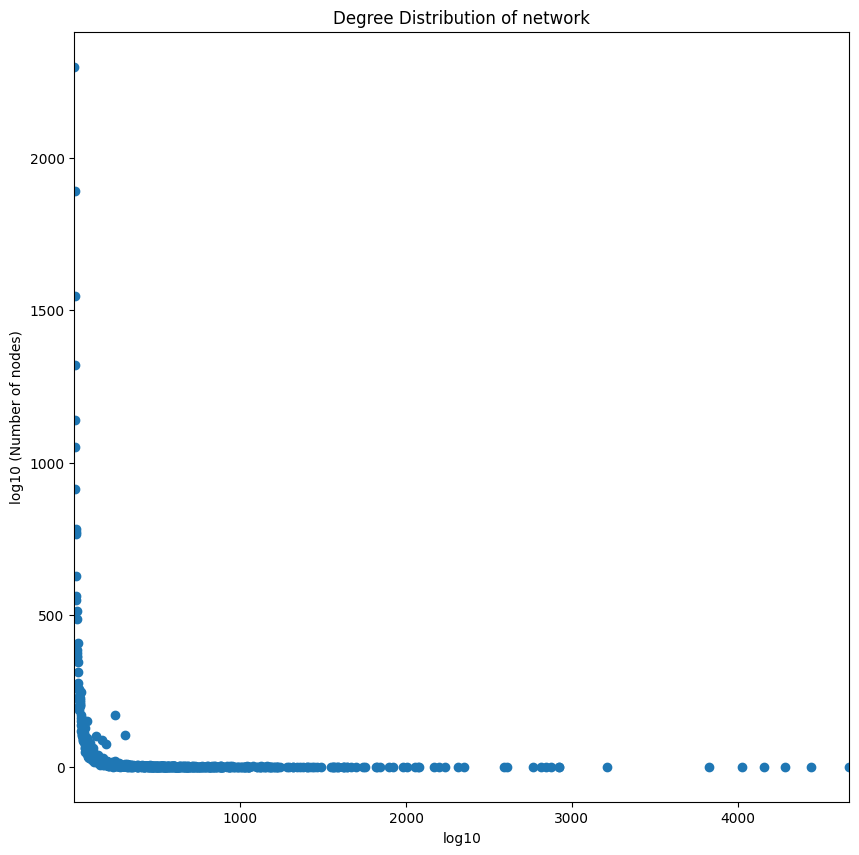

In [50]:
import numpy as np
out_degrees = dict(G.degree()) # dictionary node:degree
# filtering nodes outdegree values with outdegree > 0
pos_out_degree_vals = list(filter(lambda val: val > 0, out_degrees.values()))
# getting unique and sorted outdegree values
uq_pos_out_degree_vals = sorted(set(pos_out_degree_vals))
# counting frequency of each outdegree values
out_hist = [pos_out_degree_vals.count(x) for x in uq_pos_out_degree_vals]


x = np.asarray(uq_pos_out_degree_vals, dtype = float)
y = np.asarray(out_hist, dtype = float)

plt.figure(figsize=(10,10))
plt.xlim(min(x), max(x))
plt.xlabel('log10')
plt.ylabel('log10 (Number of nodes)')
plt.title('Degree Distribution of network')
out_degree_dist = plt.plot(x, y, 'o')

a: -1.4100774790004271
b: 4.2248918106754525


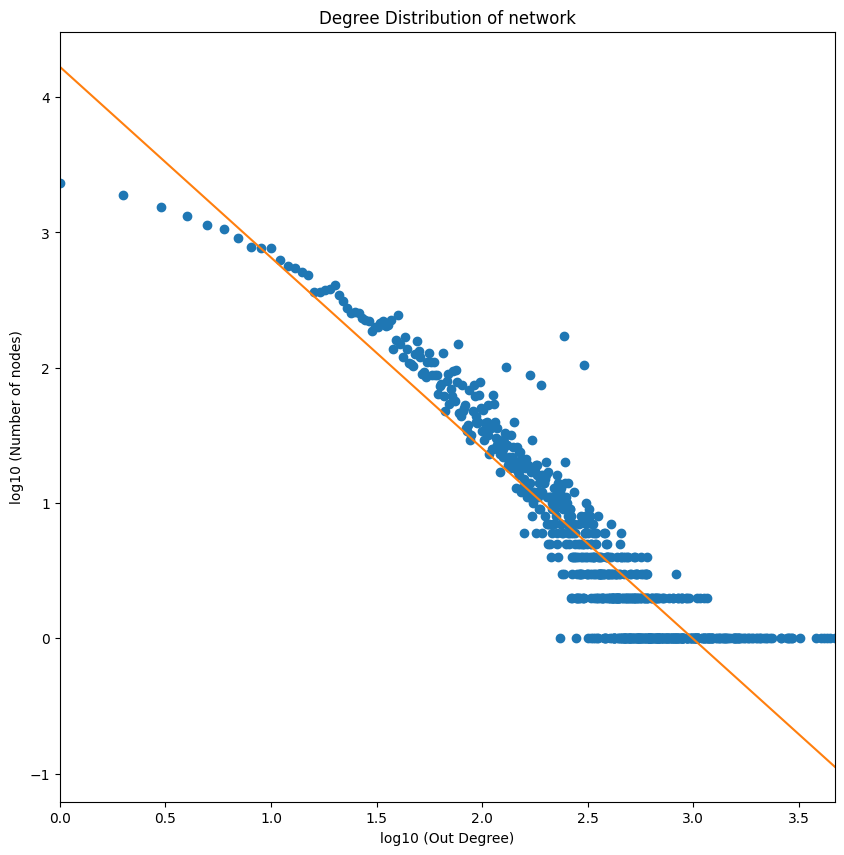

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def degree_distribution(G):
    out_degrees = dict(G.degree())  # dictionary node:degree
    # filtering nodes outdegree values with outdegree > 0
    pos_out_degree_vals = list(filter(lambda val: val > 0, out_degrees.values()))
    # getting unique and sorted outdegree values
    uq_pos_out_degree_vals = sorted(set(pos_out_degree_vals))
    # counting frequency of each outdegree values
    out_hist = [pos_out_degree_vals.count(x) for x in uq_pos_out_degree_vals]
    return uq_pos_out_degree_vals, out_hist

def plot_degree_distribution(x, y):
    logx = np.log10(x)
    logy = np.log10(y)
    a, b = np.polyfit(logx, logy, 1)
    plt.figure(figsize=(10, 10))
    plt.xlim(min(logx), max(logx))
    plt.xlabel('log10')
    plt.ylabel('log10 (Number of nodes)')
    plt.title('Degree Distribution of network')
    out_degree_dist = plt.plot(logx, logy, 'o')
    scatter_plot_regression = plt.plot(logx, a * logx + b)
    print("a: " + str(a))
    print("b: " + str(b))
    plt.show()

uq_pos_out_degree_vals, out_hist = degree_distribution(G)
plot_degree_distribution(uq_pos_out_degree_vals, out_hist)


In [17]:
print(len(G.nodes))
print(len(G.edges))

7744
143834


In [105]:
remove = [node for node,degree in dict(G.degree()).items() if degree < 20]
H = G.copy()
H.remove_nodes_from(remove)
print(len(H.nodes))
print(len(H.edges))

3385
114553


In [22]:
import time
tima = time.time()
print(len(G.nodes))
print(len(G.edges))
girvan_communities = list(nx.community.girvan_newman(G))
print(time.time() - tima)

56
1286
6.610001564025879


In [39]:
girvan_communities[0][0]

{2050,
 2052,
 2054,
 3431,
 5346,
 10534,
 10538,
 13872,
 14064,
 15677,
 15719,
 16204,
 17125,
 44543,
 44688,
 46787,
 48464,
 59716,
 59980,
 64481,
 77604,
 96358,
 175242,
 186074,
 191113,
 191117,
 216443,
 227443,
 228665,
 267972,
 298230,
 477338,
 480204,
 595375,
 682804,
 854764,
 4954833,
 6066819,
 6936382,
 8369681,
 8483904,
 9585036,
 10806008,
 11309018,
 13230263,
 15782899,
 18528190,
 18695272,
 20768868,
 21853687,
 22738563,
 26889576,
 29780253,
 33572350}

In [54]:
import time
tima = time.time()
print(len(H.nodes))
print(len(H.edges))
asyn_fluidc_com = list(nx.community.asyn_fluidc(H,k=10))
print(time.time() - tima)

333
15976
0.22692346572875977


In [78]:
asyn_fluidc_com

[{44688,
  59980,
  121045,
  121047,
  121051,
  121052,
  121054,
  136276,
  181399,
  215801,
  288845,
  431365,
  477338,
  560262,
  833332,
  854764,
  899602,
  1098855,
  1815103,
  5928862,
  8369681,
  8483904,
  9585036,
  9956705,
  11309018,
  11566279,
  13230263,
  13440720,
  13588160,
  14949980,
  14949989,
  15782899,
  16074814,
  17324133,
  17469953,
  18405540,
  18405541,
  18695272,
  20768868,
  21412232,
  21853687,
  22889758,
  23398715,
  23492461,
  24611571,
  26722927,
  26889576,
  29780258,
  32620362,
  33572350,
  33931059},
 {22208,
  26481,
  37261,
  89378,
  111000,
  159294,
  191113,
  209586,
  210297,
  233711,
  285672,
  375915,
  417780,
  421118,
  488923,
  496802,
  532469,
  591240,
  789344,
  847581,
  899608,
  1008587,
  1206079,
  1717864,
  2318011,
  7095054,
  7123496,
  7961855,
  12291714,
  12429335,
  12750296,
  16074339,
  17324134,
  18490990,
  22749518,
  24694140,
  28250901},
 {5346,
  6697,
  10538,
  15677,
  15

In [80]:
asyn_fluidc_com_key_values

{17469953: 0,
 431365: 0,
 560262: 0,
 21412232: 0,
 9585036: 0,
 44688: 0,
 8369681: 0,
 899602: 0,
 181399: 0,
 477338: 0,
 22889758: 0,
 5928862: 0,
 29780258: 0,
 18405540: 0,
 18405541: 0,
 33931059: 0,
 833332: 0,
 13230263: 0,
 23398715: 0,
 16074814: 0,
 1815103: 0,
 8483904: 0,
 13588160: 0,
 11566279: 0,
 32620362: 0,
 59980: 0,
 288845: 0,
 13440720: 0,
 136276: 0,
 121045: 0,
 121047: 0,
 11309018: 0,
 121051: 0,
 14949980: 0,
 121052: 0,
 121054: 0,
 9956705: 0,
 20768868: 0,
 14949989: 0,
 17324133: 0,
 1098855: 0,
 18695272: 0,
 26889576: 0,
 854764: 0,
 23492461: 0,
 26722927: 0,
 15782899: 0,
 24611571: 0,
 21853687: 0,
 215801: 0,
 33572350: 0,
 12291714: 1,
 591240: 1,
 191113: 1,
 37261: 1,
 7095054: 1,
 28250901: 1,
 12429335: 1,
 899608: 1,
 111000: 1,
 496802: 1,
 89378: 1,
 7123496: 1,
 209586: 1,
 2318011: 1,
 159294: 1,
 1206079: 1,
 22208: 1,
 1008587: 1,
 22749518: 1,
 12750296: 1,
 488923: 1,
 847581: 1,
 789344: 1,
 16074339: 1,
 17324134: 1,
 285672: 1,
 

In [82]:
print(len(asyn_fluidc_com_key_values.keys()))
print(len(H.nodes))

333
333


In [90]:
178186 in list(asyn_fluidc_com_key_values.keys())

False

In [91]:
178186 in list(H.nodes)

False

In [92]:
len(asyn_fluidc_com)

10

/tmp/ipykernel_8102/3469661581.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', len(asyn_fluidc_com))


KeyError: 178186

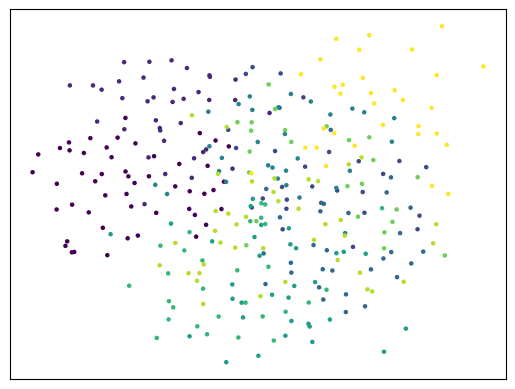

In [81]:
from community import community_louvain
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import operator
from collections import Counter
asyn_fluidc_com_key_values = {}
for index, aa in enumerate(asyn_fluidc_com):
    for item in aa:
        asyn_fluidc_com_key_values[item] = index
# load the karate club graph
# G = nx.karate_club_graph()

#first compute the best partition
# partition = nx.community.louvain_communities(G, seed=123)
# partition = community_louvain.best_partition(G)
# print(len(set(partition.values())))

# draw the graph
pos = nx.spring_layout(H)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', len(asyn_fluidc_com))
nx.draw_networkx_nodes(G, pos, asyn_fluidc_com_key_values.keys(), node_size=5,
                       cmap=cmap, node_color=list(asyn_fluidc_com_key_values.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [27]:
len(list(nx.connected_components(G)))

1

1


/tmp/ipykernel_8590/1405269425.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


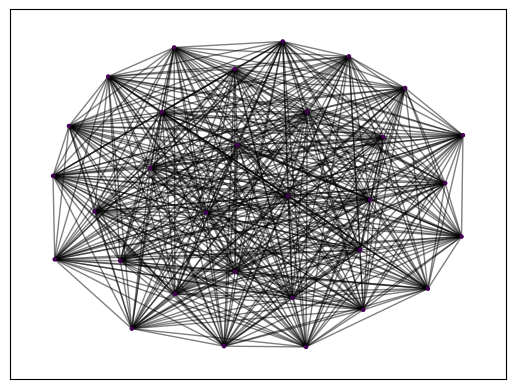

In [63]:
from community import community_louvain
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import operator
from collections import Counter

# load the karate club graph
# G = nx.karate_club_graph()

#first compute the best partition
# partition = nx.community.louvain_communities(G, seed=123)
partition = community_louvain.best_partition(G)
print(len(set(partition.values())))

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=5,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [44]:
print(max(partition.values()) + 1)

4


In [25]:
partition.values()

dict_values([1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 0, 3, 1, 0, 1, 1, 1, 1, 3, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 3, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 3, 1, 0, 1, 1, 3, 1, 1, 1, 2, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 3, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 3, 0, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 3, 2, 1, 0, 1, 1, 1, 3, 1, 1, 3, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 3, 1, 1, 1, 1, 3, 0, 0, 1, 1, 0, 3, 0, 0, 3, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 0, 0, 0, 0, 1, 3, 1, 1, 1, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 3, 0, 2, 1, 0, 1, 0, 0, 1, 3, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 3, 1, 1, 3, 1, 0, 0, 3, 1, 2, 3, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 

In [26]:
partition.keys()

dict_keys([19398490, 8664353, 2052, 31450633, 5060378, 29780253, 17325147, 52403, 8683812, 49552, 21686, 25065629, 12349, 96358, 227443, 13872, 6936382, 9415946, 595375, 3431, 6320534, 186074, 59716, 9555, 5890, 424, 12505535, 76706, 12067, 7907803, 14064, 15196, 29780258, 95431, 6068551, 32283424, 23876, 1832749, 6066819, 18528190, 192955, 2054, 11360892, 113348, 28815474, 1375896, 2233407, 13323842, 228665, 7677, 7821828, 28249, 17125, 4954833, 298230, 200572, 33584812, 64481, 46787, 72854, 149572, 11734, 18600, 77505, 18634982, 38568, 144974, 16204, 93101, 769896, 48464, 413965, 73070, 18213783, 34492, 34541, 17950614, 14817, 3678651, 18603, 22642971, 19534, 1113545, 187060, 175242, 761381, 191113, 381496, 22738563, 175246, 231614, 20881071, 10538, 649361, 751579, 46685, 15793074, 20499240, 213472, 42661, 12749487, 8520362, 10806008, 48974, 20768868, 89477, 15677, 875441, 1068825, 3235328, 18010, 44543, 682804, 175243, 17994, 611395, 20588698, 7029926, 18695272, 7163609, 13230263, 4

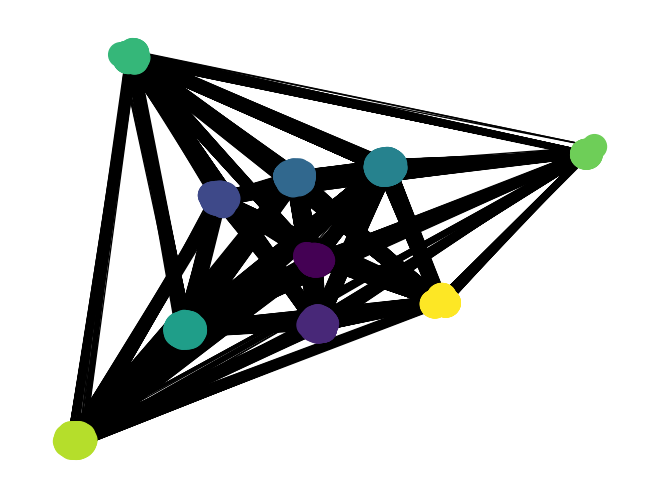

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=0.1)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

def test(G):
    # to install networkx 2.0 compatible version of python-louvain use:
    # pip install -U git+https://github.com/taynaud/python-louvain.git@networkx2
    from community import community_louvain

    # g = nx.karate_club_graph()
    partition = community_louvain.best_partition(G)
    pos = community_layout(G, partition)

    nx.draw(G, pos, node_color=list(partition.values())); plt.show()
    return
test(G)

In [14]:
genres = pd.read_json('goodreads_book_genres_initial.json', lines = True)

In [15]:
genres.describe()

book_id
count  2.360655e+06
mean   1.540953e+07
std    1.081897e+07
min    1.000000e+00
25%    5.979046e+06
50%    1.585681e+07
75%    2.438194e+07
max    3.653043e+07

In [18]:
genre_dict = {
    'romance':0,
    'comics, graphic':0,
    'mystery, thriller, crime':0,
    'fantasy, paranormal':0,
    'young-adult':0,
    'non-fiction':0,
    'history, historical fiction, biography':0,
    'children':0,
    'fiction':0,
    'poetry':0   
}
for index,row in genres.iterrows():
    for key in row['genres'].keys():
        genre_dict[key] += 1


In [19]:
genre_dict

{'romance': 658719,
 'comics, graphic': 171279,
 'mystery, thriller, crime': 523156,
 'fantasy, paranormal': 538311,
 'young-adult': 364114,
 'non-fiction': 533491,
 'history, historical fiction, biography': 663795,
 'children': 256935,
 'fiction': 1244112,
 'poetry': 88630}

In [18]:
list(G.nodes)

[19398490,
 8664353,
 178186,
 108905,
 2052,
 32620360,
 31450633,
 5060378,
 29780253,
 17325147,
 52403,
 8683812,
 49552,
 21686,
 25065629,
 12349,
 96358,
 227443,
 13872,
 889028,
 6936382,
 9415946,
 595375,
 3431,
 6320534,
 186074,
 59716,
 9555,
 5890,
 424,
 12505535,
 76706,
 12067,
 7907803,
 14064,
 15196,
 29780258,
 95431,
 2957738,
 6068551,
 32283424,
 32620363,
 15818133,
 23876,
 1832749,
 6066819,
 18528190,
 192377,
 192955,
 2054,
 11360892,
 113348,
 28815474,
 1375896,
 2233407,
 13323842,
 228665,
 7677,
 18001867,
 6583171,
 7821828,
 28249,
 25854070,
 17125,
 11731782,
 4954833,
 298230,
 200572,
 33584812,
 64481,
 46787,
 7932159,
 72854,
 12063158,
 33543707,
 23389993,
 18618994,
 17609729,
 825419,
 32887579,
 149572,
 11734,
 18600,
 779509,
 4936988,
 77505,
 18634982,
 38568,
 144974,
 16204,
 93101,
 769896,
 48464,
 413965,
 73070,
 28443817,
 65335,
 18213783,
 34492,
 34541,
 301304,
 17950614,
 14817,
 3678651,
 18603,
 22642971,
 1054231,
 41

In [31]:
genres = genres[genres['book_id'].isin(list(GG.nodes))]
genres.describe()

book_id
count  7.908000e+03
mean   5.808450e+06
std    8.588672e+06
min    1.090000e+02
25%    4.301372e+05
50%    1.317824e+06
75%    7.631032e+06
max    3.644277e+07

In [127]:
print(dict(genres.iloc[2990:3000]['genres']))

{27762: {'romance': 35, 'fiction': 20, 'mystery, thriller, crime': 9}, 27795: {'fiction': 19407, 'fantasy, paranormal': 6599, 'young-adult': 315}, 27798: {'non-fiction': 1}, 27827: {'history, historical fiction, biography': 1}, 27828: {'children': 18, 'fiction': 3, 'young-adult': 2, 'fantasy, paranormal': 3, 'non-fiction': 1}, 27889: {'mystery, thriller, crime': 15, 'non-fiction': 11}, 27895: {'children': 35, 'history, historical fiction, biography': 3, 'fiction': 4, 'fantasy, paranormal': 1}, 27928: {'children': 17, 'fiction': 2, 'history, historical fiction, biography': 1, 'non-fiction': 1}, 27940: {'children': 16, 'poetry': 1, 'fiction': 1, 'fantasy, paranormal': 1}, 27941: {'children': 2}}


In [60]:
genre_to_id = {}
bookid_to_genre = {}
communities_genres = []
ids = 0
for index, row in genres.iterrows():
    for key,value in row['genres'].items():
        if key not in genre_to_id.keys():
            genre_to_id[key] = ids
            ids +=1
    try:
        first_genre_key = next(iter(row['genres']))
    except Exception:
        continue
    first_genre_id = genre_to_id[first_genre_key]
    bookid_to_genre[row['book_id']] = first_genre_id

print(genre_to_id)
print(len(bookid_to_genre.keys()))
for key,value in genre_to_id.items():
    communities_genres.append(set())
for key,value in bookid_to_genre.items():
    communities_genres[value].add(key)

{'history, historical fiction, biography': 0, 'fiction': 1, 'fantasy, paranormal': 2, 'mystery, thriller, crime': 3, 'poetry': 4, 'romance': 5, 'non-fiction': 6, 'children': 7, 'young-adult': 8, 'comics, graphic': 9}
1951142


In [53]:
for key in communities_genres:
    print(len(key))

709
2334
739
241
605
616
379
770
1050
297


In [28]:
print(len(genre_to_id.keys()))
print(G.nodes)
print(len(G.nodes))
print(len(bookid_to_genre.keys()))

NameError: name 'genre_to_id' is not defined

/tmp/ipykernel_8590/332783241.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(bookid_to_genre.values()) + 1)


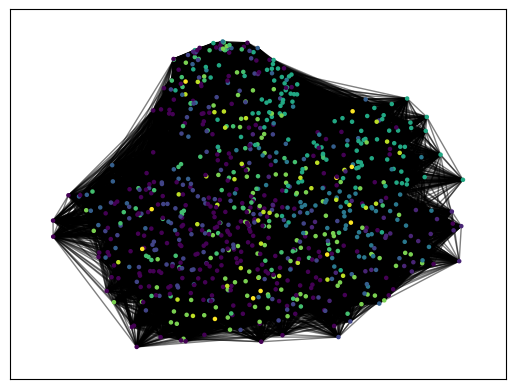

In [42]:
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(bookid_to_genre.values()) + 1)
nx.draw_networkx_nodes(G, pos, bookid_to_genre.keys(), node_size=5,
                       cmap=cmap, node_color=list(bookid_to_genre.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)

In [100]:
 # cores with at lest degree 30
G_core_30 = nx.k_core(H, 1)
# similarly, with at least degree 60
G_core_60 = nx.k_core(H, 1)
print(G_core_30)
print(G_core_60)
# Visualize network and k-cores
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
pos = nx.spring_layout(H, k=0.1)
nx.draw_networkx(
    H, pos=pos, node_size=0, edge_color="#333333", alpha=0.05, with_labels=False)
nx.draw_networkx(
     G_core_30, pos=pos, node_size=0, edge_color="green", alpha=0.05, with_labels=False)
nx.draw_networkx(
        G_core_60, pos=pos, node_size=0, edge_color="red", alpha=0.05, with_labels=False)

Graph with 333 nodes and 15976 edges
Graph with 333 nodes and 15976 edges


In [43]:
print(nx.degree_centrality(G))

{1: 0.5714285714285714, 2: 0.42857142857142855, 3: 0.42857142857142855, 4: 0.14285714285714285, 5: 0.42857142857142855, 10: 0.14285714285714285, 7: 0.2857142857142857, 9: 0.14285714285714285}


In [44]:
print(nx.closeness_centrality(G))

{1: 0.5833333333333334, 2: 0.5384615384615384, 3: 0.6363636363636364, 4: 0.3684210526315789, 5: 0.5384615384615384, 10: 0.3888888888888889, 7: 0.4117647058823529, 9: 0.3684210526315789}


In [45]:
print(nx.betweenness_centrality(G))

{1: 0.38095238095238093, 2: 0.09523809523809523, 3: 0.5714285714285714, 4: 0.0, 5: 0.5238095238095237, 10: 0.0, 7: 0.0, 9: 0.0}


In [51]:
print(list(nx.bridges(G)))

[(1, 10), (3, 5), (4, 5), (5, 9)]


In [52]:
print(list(nx.connected_components(G)))

[{1, 2, 3, 4, 5, 7, 9, 10}]


30778
856080


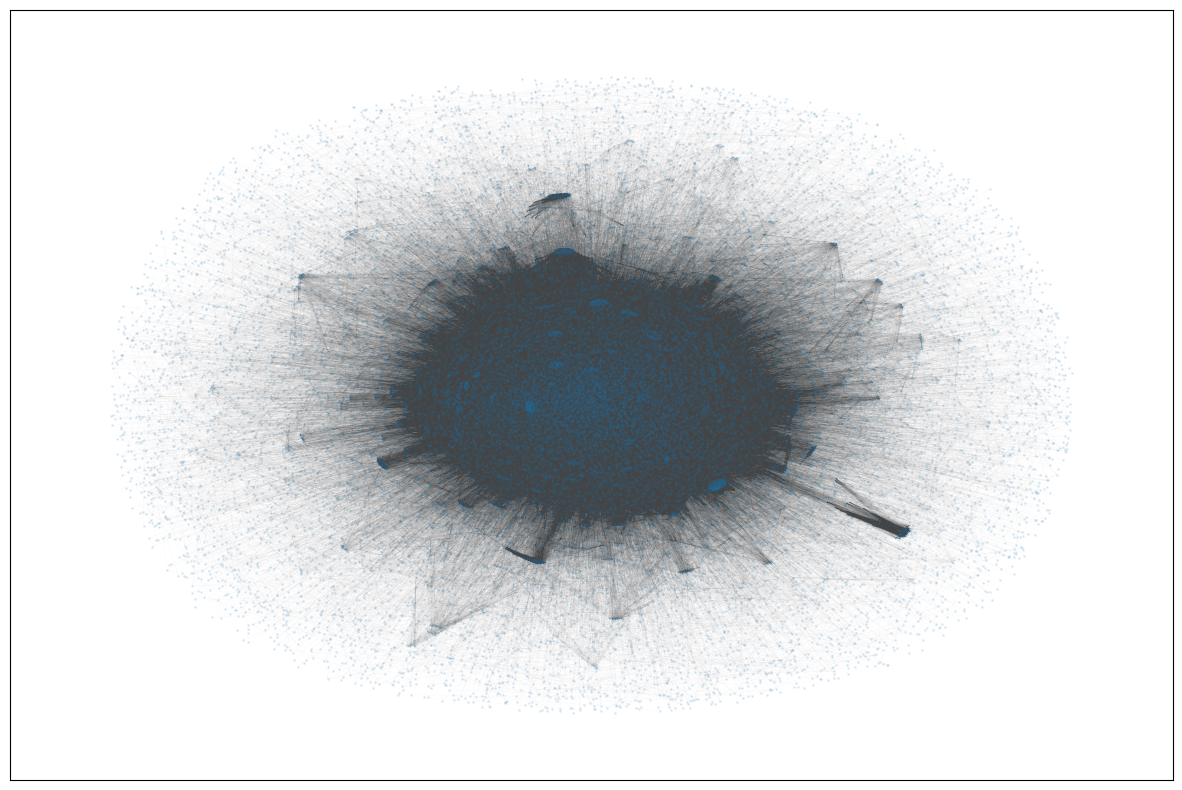

In [11]:
print(len(G.nodes()))
print(len(G.edges()))
pos = nx.spring_layout(G, k=0.1)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(
        G,
        pos=pos,
        node_size=1,
        edge_color="#444444",
        alpha=0.1,
        with_labels=False,
        width=0.1)
plt.show()

In [14]:
def set_node_community(G, communities):
        '''Add community to node attributes'''
        for c, v_c in enumerate(communities):
            for v in v_c:
                # Add 1 to save 0 for external edges
                G.nodes[v]['community'] = c + 1
def set_edge_community(G):
        '''Find internal edges and add their community to their attributes'''
        for v, w, in G.edges:
            if G.nodes[v]['community'] == G.nodes[w]['community']:
                # Internal edge, mark with community
                G.edges[v, w]['community'] = G.nodes[v]['community']
            else:
                # External edge, mark as 0
                G.edges[v, w]['community'] = 0
def get_color(i, r_off=1, g_off=1, b_off=1):
        '''Assign a color to a vertex.'''
        r0, g0, b0 = 0, 0, 0
        n = 16
        low, high = 0.1, 0.9
        span = high - low
        r = low + span * (((i + r_off) * 3) % n) / (n - 1)
        g = low + span * (((i + g_off) * 5) % n) / (n - 1)
        b = low + span * (((i + b_off) * 7) % n) / (n - 1)
        return (r, g, b)

In [62]:
remove = [node for node,degree in dict(G.degree()).items() if degree < 50]
GG = G.copy()
GG.remove_nodes_from(remove)
print(len(GG.nodes))
print(len(GG.edges))
print(len(G.nodes))
print(len(G.edges))

7908
601611
30778
856080


In [ ]:
import networkx.algorithms.community as nxcom
communities_G = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)
len(communities_G)

In [26]:
import networkx.algorithms.community as nxcom
communities_GG = sorted(nxcom.greedy_modularity_communities(GG), key=len, reverse=True)
len(communities_GG)

13

In [80]:
def plot_comminities(a_graph, a_community):
    plt.rcParams.update(plt.rcParamsDefault)
    plt.rcParams.update({'figure.figsize': (15, 10)})
    plt.style.use('dark_background')
    # Set node and edge communities
    set_node_community(a_graph, a_community)
    set_edge_community(a_graph)
    # Set community color for internal edges
    external = [(v, w) for v, w in a_graph.edges if a_graph.edges[v, w]['community'] == 0]
    internal = [(v, w) for v, w in a_graph.edges if a_graph.edges[v, w]['community'] > 0]
    internal_color = ["black" for e in internal]
    node_color = [get_color(a_graph.nodes[v]['community']) for v in a_graph.nodes]
    # external edges
    nx.draw_networkx(
            a_graph,
            pos=pos,
            node_size=0,
            edgelist=external,
            edge_color="silver",
            node_color=node_color,
            alpha=0.2,
            with_labels=False)
        # internal edges
    nx.draw_networkx(
            a_graph, pos=pos,
            edgelist=internal,
            edge_color=internal_color,
            node_color=node_color,
            alpha=0.1,
            with_labels=False)
    plt.show()

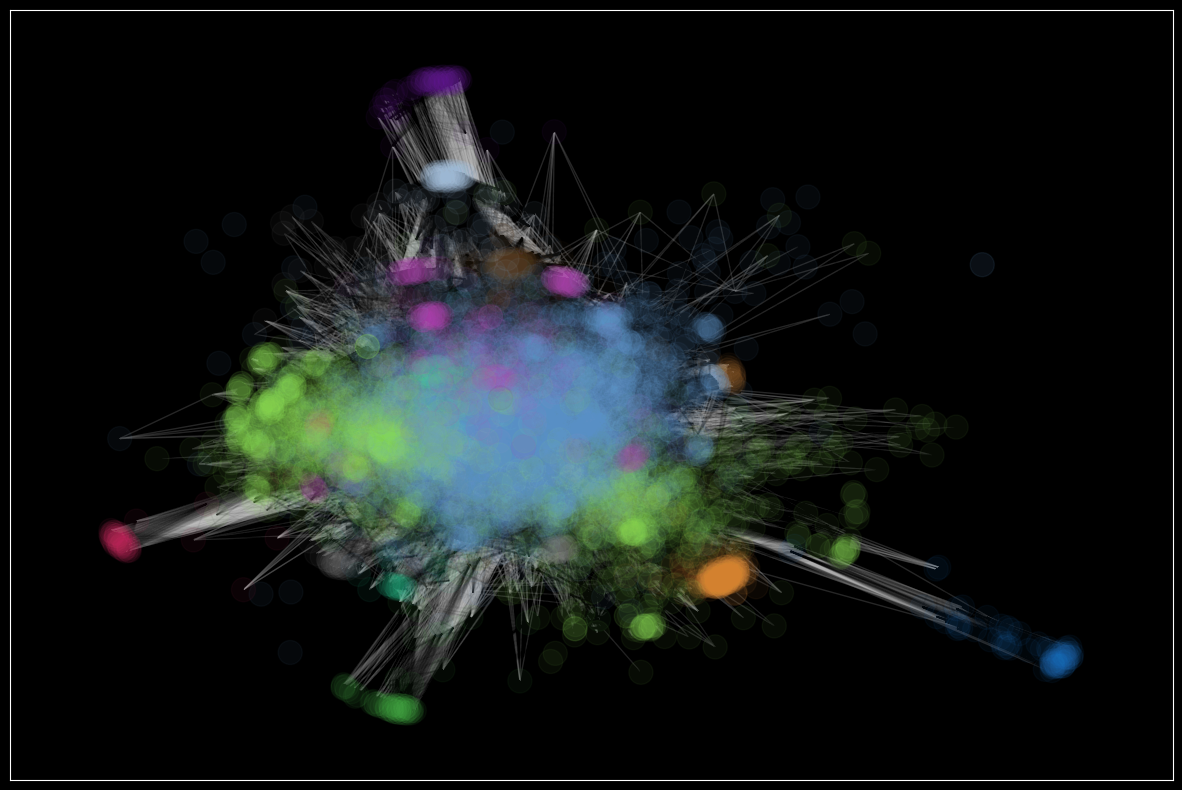

In [27]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
# Set node and edge communities
set_node_community(GG, communities_GG)
set_edge_community(GG)
# Set community color for internal edges
external = [(v, w) for v, w in GG.edges if GG.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in GG.edges if GG.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(GG.nodes[v]['community']) for v in GG.nodes]
# external edges
nx.draw_networkx(
        GG,
        pos=pos,
        node_size=0,
        edgelist=external,
        edge_color="silver",
        node_color=node_color,
        alpha=0.2,
        with_labels=False)
    # internal edges
nx.draw_networkx(
        GG, pos=pos,
        edgelist=internal,
        edge_color=internal_color,
        node_color=node_color,
        alpha=0.05,
        with_labels=False)
plt.show()

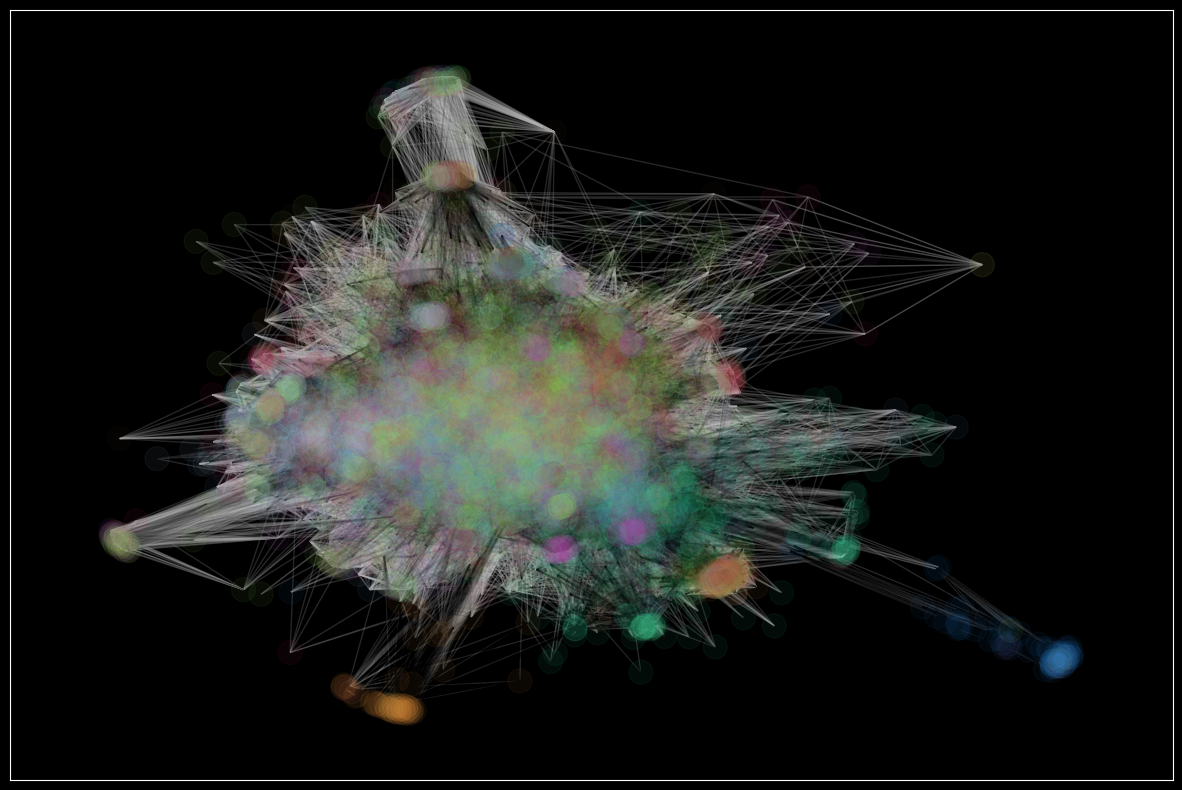

In [48]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
# Set node and edge communities
set_node_community(GG, communities_genres)
set_edge_community(GG)
# Set community color for internal edges
external = [(v, w) for v, w in GG.edges if GG.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in GG.edges if GG.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(GG.nodes[v]['community']) for v in GG.nodes]
# external edges
nx.draw_networkx(
        GG,
        pos=pos,
        node_size=0,
        edgelist=external,
        edge_color="silver",
        node_color=node_color,
        alpha=0.2,
        with_labels=False)
    # internal edges
nx.draw_networkx(
        GG, pos=pos,
        edgelist=internal,
        edge_color=internal_color,
        node_color=node_color,
        alpha=0.05,
        with_labels=False)
plt.show()

7908
3384


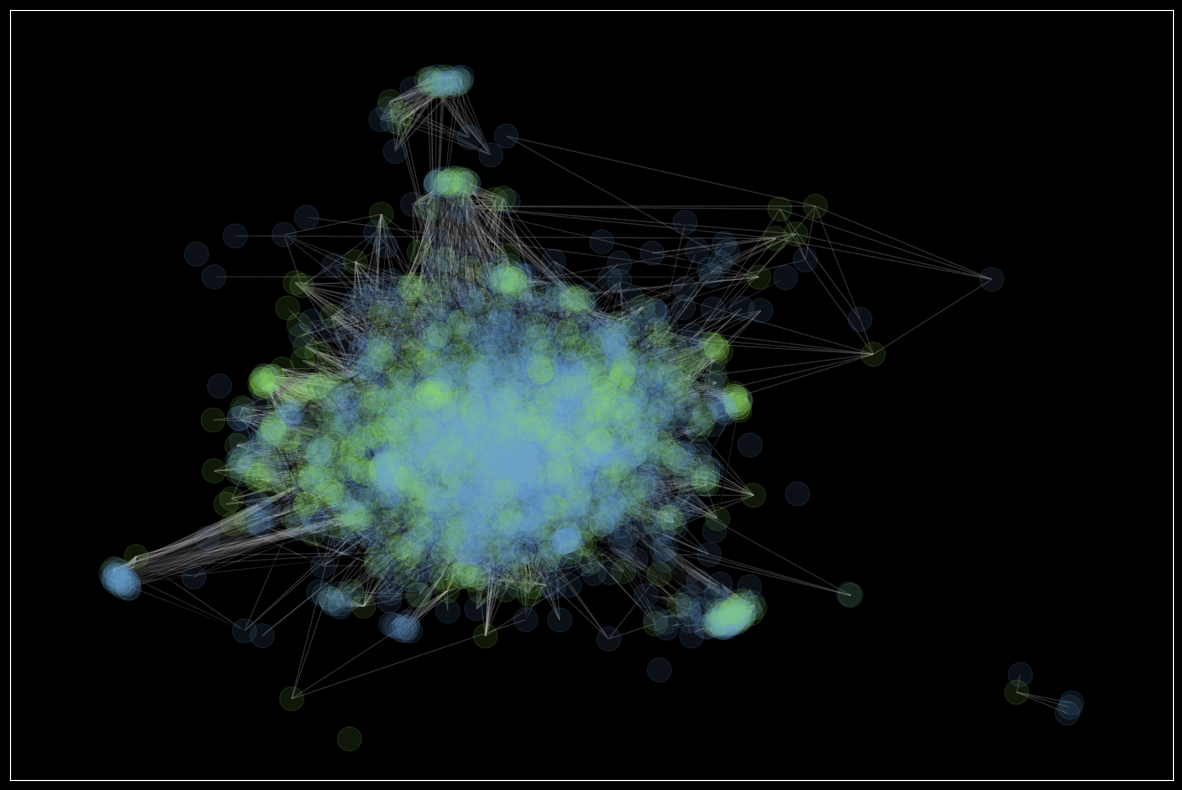

In [82]:
## fiction vs non-fiction
partial1_communities_genres = [communities_genres[1], communities_genres[8]]
partial1_communities_genres_nodes = list(partial1_communities_genres[0]) + (list(partial1_communities_genres[1]))
GG_partial1 = GG.copy()
print(len(GG_partial1.nodes))
remove = [node for node,degree in dict(GG_partial1.degree()).items() if node not in partial1_communities_genres_nodes]
GG_partial1.remove_nodes_from(remove)
print(len(GG_partial1.nodes))
plot_comminities(GG_partial1, partial1_communities_genres)

7908
1344


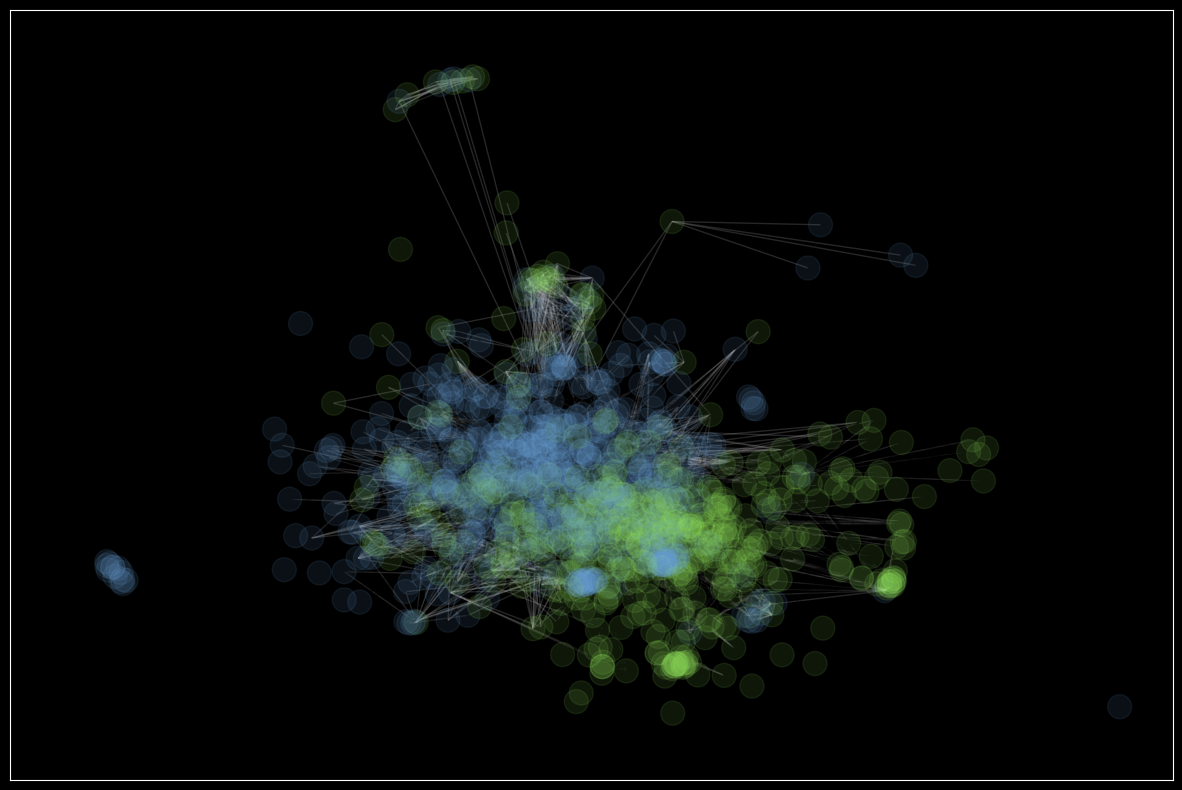

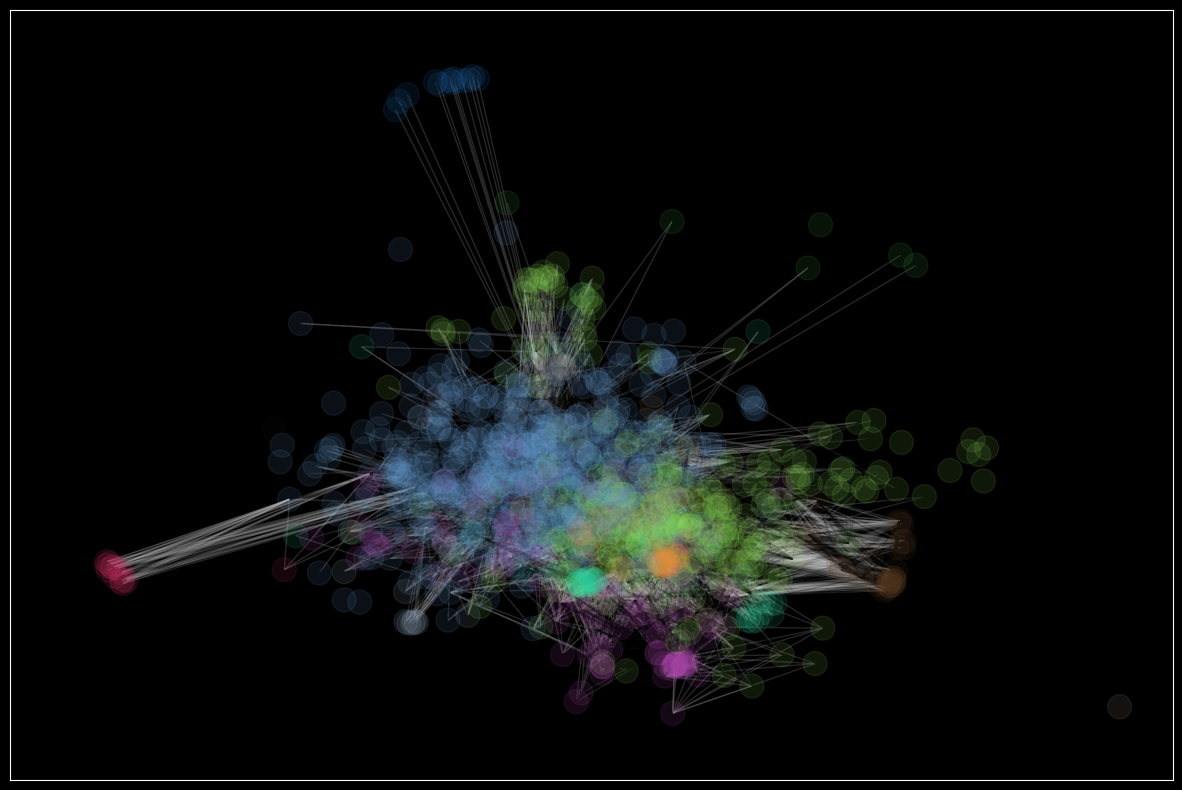

In [111]:
## thriller,crime vs romance
partial1_communities_genres = [communities_genres[2], communities_genres[4]]
partial1_communities_genres_nodes = list(partial1_communities_genres[0]) + (list(partial1_communities_genres[1]))
GG_partial1 = GG.copy()
print(len(GG_partial1.nodes))
remove = [node for node,degree in dict(GG_partial1.degree()).items() if node not in partial1_communities_genres_nodes]
GG_partial1.remove_nodes_from(remove)
print(len(GG_partial1.nodes))
plot_comminities(GG_partial1, partial1_communities_genres)
partial1_communities_genres2 = sorted(nxcom.greedy_modularity_communities(GG_partial1), key=len, reverse=True)
plot_comminities(GG_partial1, partial1_communities_genres2)

{2052: 18, 32620360: 1, 31450633: 18, 17325147: 1, 52403: 18, 21686: 18, 5890: 18, 76706: 18, 6068551: 1, 2054: 18, 28815474: 18, 25854070: 13, 33543707: 1, 23389993: 1, 18618994: 1, 17609729: 1, 149572: 18, 18634982: 18, 73070: 1, 1054231: 18, 411168: 11, 175242: 18, 18873617: 1, 175246: 18, 20881071: 18, 213472: 18, 12749487: 1, 20768868: 14, 24890983: 1, 3235328: 18, 175243: 18, 611395: 5, 29974338: 1, 129117: 18, 2313876: 18, 6953500: 4, 21685: 18, 31549837: 1, 21681: 18, 156563: 1, 39797: 18, 21853687: 18, 11982554: 18, 27065431: 18, 39795: 18, 776384: 5, 15776723: 18, 29637128: 1, 231585: 11, 23252909: 18, 18711342: 1, 414392: 18, 412244: 18, 1911905: 11, 488644: 11, 457953: 11, 175247: 18, 22820059: 1, 13826979: 1, 9574917: 18, 587359: 18, 250708: 18, 462962: 18, 644006: 18, 11888056: 1, 15768105: 18, 107047: 18, 32970439: 18, 97569: 18, 2161794: 18, 25335779: 1, 20256653: 1, 11599750: 4, 307441: 18, 20409692: 18, 19043053: 18, 17726041: 18, 1250251: 18, 519725: 1, 28563: 18, 88

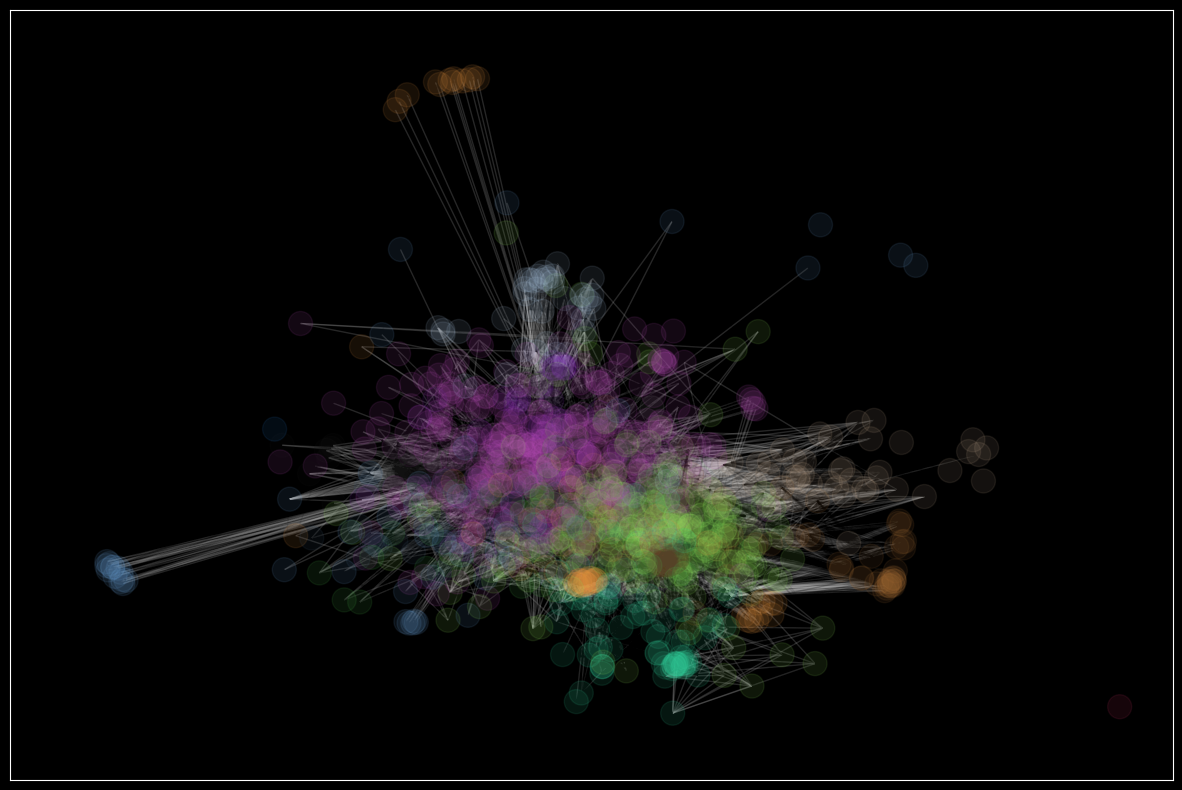

In [124]:
from community import community_louvain
louvain = community_louvain.best_partition(GG_partial1)
print(louvain)
louvain_comms = []
louvain_keys = list(set(louvain.values()))
for i in range(max(louvain_keys) + 1):
    louvain_comms.append(set())
for key,value in louvain.items():
    louvain_comms[value].add(key)
plot_comminities(GG_partial1, louvain_comms)

Graph with 550 nodes and 77003 edges
Graph with 135 nodes and 4562 edges


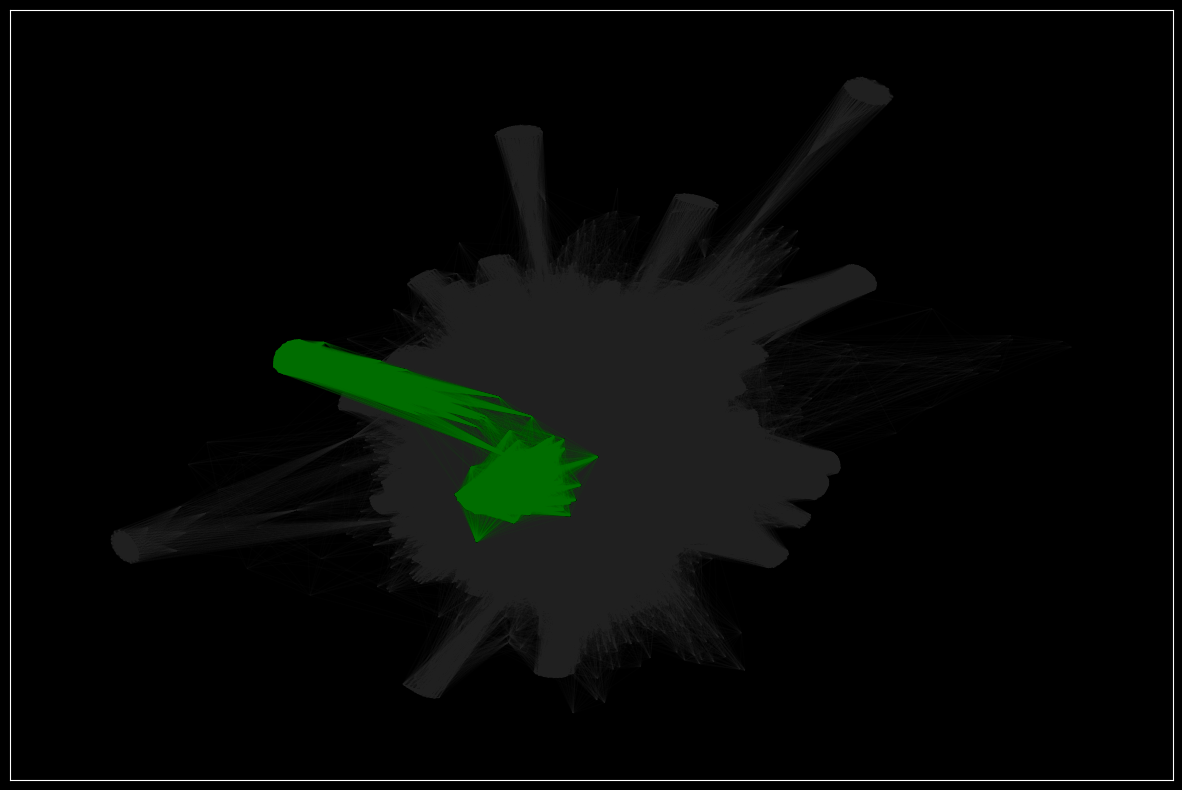

In [139]:
# cores with at lest degree 30
G_core_30 = nx.k_core(GG, 200)
# similarly, with at least degree 60
# G_core_60 = nx.k_core(GG_partial1, 60)
print(G_core_30)
print(G_core_60)
# Visualize network and k-cores
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
pos = nx.spring_layout(GG, k=0.1)
nx.draw_networkx(
    GG, pos=pos, node_size=0, edge_color="#333333", alpha=0.05, with_labels=False)
nx.draw_networkx(
     G_core_30, pos=pos, node_size=0, edge_color="green", alpha=0.05, with_labels=False)
# nx.draw_networkx(
#         G_core_60, pos=pos, node_size=0, edge_color="red", alpha=0.05, with_labels=False)
plt.show()

In [113]:
len(list(nx.connected_components(GG_partial1)))

5

7908
1149


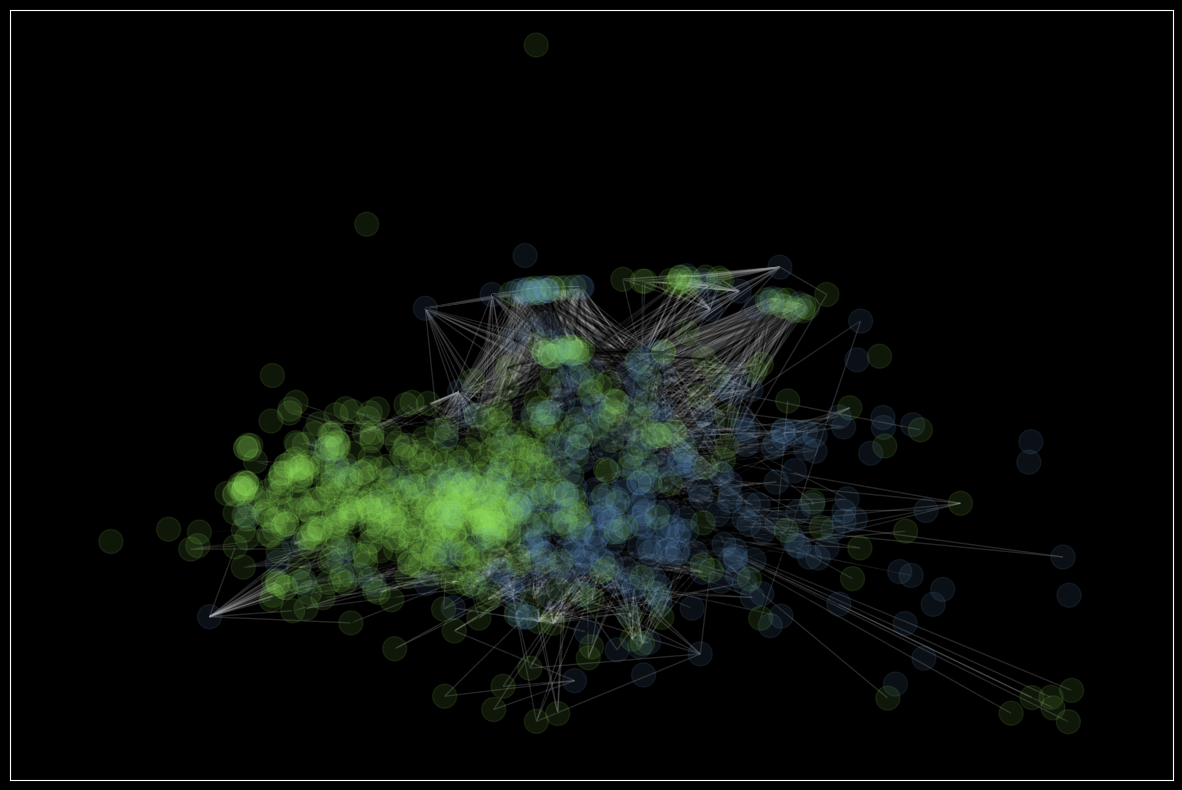

In [84]:
## adult vs children
partial1_communities_genres = [communities_genres[6], communities_genres[7]]
partial1_communities_genres_nodes = list(partial1_communities_genres[0]) + (list(partial1_communities_genres[1]))
GG_partial1 = GG.copy()
print(len(GG_partial1.nodes))
remove = [node for node,degree in dict(GG_partial1.degree()).items() if node not in partial1_communities_genres_nodes]
GG_partial1.remove_nodes_from(remove)
print(len(GG_partial1.nodes))
plot_comminities(GG_partial1, partial1_communities_genres)

7908
2288


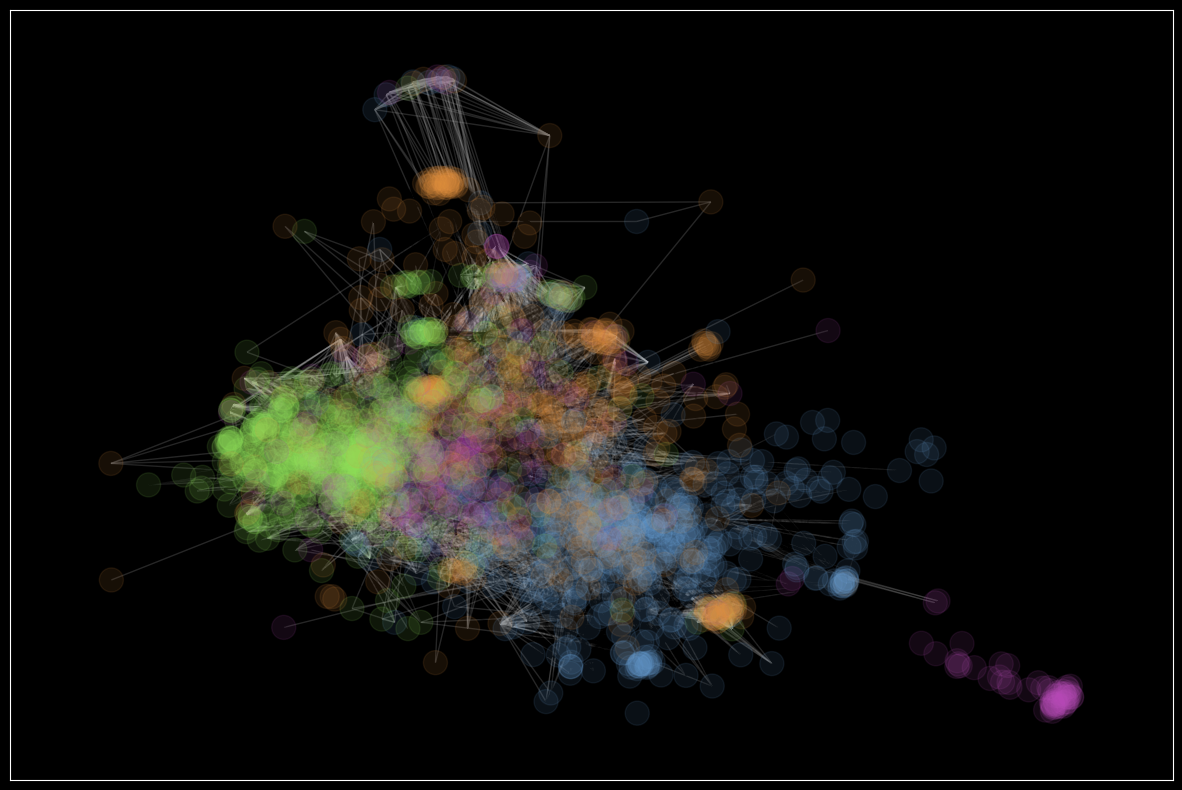

In [109]:
## remove fictions
partial1_communities_genres = [ 
    #communities_genres[2],#communities_genres[1],
    communities_genres[4],
    #communities_genres[6],
    communities_genres[7], #communities_genres[8],
    communities_genres[9], communities_genres[5]
    ]
partial1_communities_genres_nodes = []
for aa in partial1_communities_genres:
    partial1_communities_genres_nodes += list(aa)
GG_partial1 = GG.copy()
print(len(GG_partial1.nodes))
remove = [node for node,degree in dict(GG_partial1.degree()).items() if node not in partial1_communities_genres_nodes]
GG_partial1.remove_nodes_from(remove)
print(len(GG_partial1.nodes))
plot_comminities(GG_partial1, partial1_communities_genres)

In [63]:
## conductance
conductance = []
for index1, com1 in enumerate(communities_genres):
    conductance.append([])
    for index2, com2 in enumerate(communities_genres):
        conductance[index1].append(nx.conductance(GG, com1, com2))

In [64]:
import numpy as np
print(np.matrix(conductance))


[[0.07928231 0.29114576 0.07567629 0.09329179 0.07742099 0.05071724
  0.14915378 0.07653068 0.02999473 0.03617749]
 [0.29114576 0.19276399 0.29209994 0.30976738 0.25240472 0.15177762
  0.32076994 0.20963122 0.25945923 0.26304266]
 [0.07567629 0.29209994 0.09614296 0.09045314 0.06208867 0.13708761
  0.08543705 0.07705992 0.11721678 0.10828225]
 [0.09329179 0.30976738 0.09045314 0.11892129 0.05351848 0.07628448
  0.10423955 0.05774874 0.06992755 0.06295092]
 [0.07742099 0.25240472 0.06208867 0.05351848 0.12638316 0.01196934
  0.11325667 0.07987995 0.02495118 0.03023071]
 [0.05071724 0.15177762 0.13708761 0.07628448 0.01196934 0.19724328
  0.04529301 0.04355208 0.06739277 0.0244589 ]
 [0.14915378 0.32076994 0.08543705 0.10423955 0.11325667 0.04529301
  0.08789044 0.10536904 0.08427949 0.09612578]
 [0.07653068 0.20963122 0.07705992 0.05774874 0.07987995 0.04355208
  0.10536904 0.17238671 0.13134664 0.10269402]
 [0.02999473 0.25945923 0.11721678 0.06992755 0.02495118 0.06739277
  0.08427949

In [65]:
min_conductance = [min(enumerate(iterable), key=lambda x: x[1])[0] for iterable in conductance]
min_conductance

[8, 5, 4, 4, 5, 4, 5, 5, 4, 5]

In [66]:
max_conductance = [max(enumerate(iterable), key=lambda x: x[1])[0] for iterable in conductance]
max_conductance

[1, 6, 1, 1, 1, 5, 1, 1, 1, 1]

In [54]:
## pagerank
pr = nx.pagerank(G, alpha=0.9)
pr = dict(sorted(pr.items(), key=lambda item: item[1], reverse=True))
pr

{5060378: 0.002772487775460632,
 186074: 0.0025213520798788307,
 8664353: 0.0024899711080350467,
 6068551: 0.0024052927181849515,
 12067: 0.0023713604360626407,
 6936382: 0.00215432936773139,
 49552: 0.001951427291343639,
 6320534: 0.0018551957130352285,
 3431: 0.0016643012001859823,
 8683812: 0.0016449606289802468,
 5890: 0.0015558869433460565,
 228665: 0.0015375671186640674,
 2052: 0.0014807926835242085,
 227443: 0.0014653004915792026,
 21686: 0.0014174153988963942,
 59716: 0.0012695215068022887,
 22738563: 0.0012687014620943009,
 96358: 0.001253422161204958,
 3432478: 0.0012383447791321372,
 15196: 0.0012381043985647366,
 2233407: 0.0012006273200550852,
 46787: 0.0011300645544145079,
 4954833: 0.0011259275270202444,
 20588698: 0.00109468085862825,
 29780253: 0.001081684065036732,
 10534: 0.0010394289996012642,
 480204: 0.001038362665016856,
 29396: 0.0010143954439627936,
 15197: 0.0009817454474973864,
 144974: 0.000954374704885713,
 95431: 0.0009524177672311933,
 13872: 0.0009362880

In [58]:
most_important_books = []
total = 0
for key,value in pr.items():
    book = filtered_books.loc[filtered_books['book_id'] == key]
    title = book['title'].values[0]
    ratings = book['average_rating'].values[0]
    ratings_count = book['ratings_count'].values[0]
    year = book['publication_year'].values[0]
    total +=1
    print(title, ratings, ratings_count, year)
    if total == 20:
        break

The Girl Who Played with Fire (Millennium, #2) 4.22 575163 2009
The Name of the Wind (The Kingkiller Chronicle, #1) 4.55 416634 2007
Unbroken: A World War II Story of Survival, Resilience, and Redemption 4.39 504961 2010
Shiver (The Wolves of Mercy Falls, #1) 3.78 360934 2009
Good Omens: The Nice and Accurate Prophecies of Agnes Nutter, Witch 4.25 307430 2006
Anna and the French Kiss (Anna and the French Kiss, #1) 4.07 267364 2010
The Stranger 3.96 431758 1989
Under the Dome 3.89 187294 2009
The Five People You Meet in Heaven 3.9 453494 2003
The Paris Wife 3.79 195263 2011
The Woman in White 3.98 94556 2003
The Eye of the World (Wheel of Time, #1) 4.18 266994 1990
The Big Sleep (Philip Marlowe, #1) 4.03 85883 1988
Bridget Jones's Diary (Bridget Jones, #1) 3.75 748926 1999
Shutter Island 4.08 115869 2004
To the Lighthouse 3.76 84744 1989
We Should All Be Feminists 4.47 51354 2014
Batman: The Killing Joke 4.37 118236 1995
The Forest of Hands and Teeth (The Forest of Hands and Teeth, #1) 

In [155]:
closeness = nx.closeness_centrality(GG)
closeness

{19398490: 0.5110852562859544,
 8664353: 0.61451775860729,
 2052: 0.5737193440719779,
 32620360: 0.49283221141859884,
 31450633: 0.5235383698602927,
 5060378: 0.6167225645425474,
 29780253: 0.5495933829151317,
 17325147: 0.505465703509557,
 52403: 0.5113827447936877,
 8683812: 0.5695044655718813,
 49552: 0.5673387386094568,
 21686: 0.5688079994245019,
 25065629: 0.5205740996773981,
 12349: 0.5162238036168962,
 96358: 0.5588775798699462,
 227443: 0.5685625943769325,
 13872: 0.5433617372182518,
 889028: 0.5004113663692171,
 6936382: 0.6079501768414578,
 9415946: 0.5277666533173141,
 595375: 0.5304219494197357,
 3431: 0.5715628162498193,
 6320534: 0.5852268521945082,
 186074: 0.6109093718612377,
 59716: 0.5536727119949584,
 9555: 0.518016247379455,
 5890: 0.5774483312641495,
 424: 0.5149462715727776,
 12505535: 0.4993684476443097,
 76706: 0.5219141914191419,
 12067: 0.607156569146894,
 7907803: 0.5276257840651275,
 14064: 0.5422066790098059,
 15196: 0.5525892794744567,
 29780258: 0.505821

In [159]:
closeness = dict(sorted(closeness.items(), key=lambda item: item[1], reverse=True))
most_important_books = []
total = 0
for key,value in closeness.items():
    book = filtered_books.loc[filtered_books['book_id'] == key]
    title = book['title'].values[0]
    ratings = book['average_rating'].values[0]
    ratings_count = book['ratings_count'].values[0]
    total +=1
    print(title, ratings, ratings_count)
    if total == 20:
        break
closeness

The Girl Who Played with Fire (Millennium, #2) 4.22 575163
Unbroken: A World War II Story of Survival, Resilience, and Redemption 4.39 504961
The Name of the Wind (The Kingkiller Chronicle, #1) 4.55 416634
Shiver (The Wolves of Mercy Falls, #1) 3.78 360934
Anna and the French Kiss (Anna and the French Kiss, #1) 4.07 267364
Good Omens: The Nice and Accurate Prophecies of Agnes Nutter, Witch 4.25 307430
Under the Dome 3.89 187294
The Eye of the World (Wheel of Time, #1) 4.18 266994
The Woman in White 3.98 94556
The Big Sleep (Philip Marlowe, #1) 4.03 85883
The Five People You Meet in Heaven 3.9 453494
The Paris Wife 3.79 195263
Shutter Island 4.08 115869
Bridget Jones's Diary (Bridget Jones, #1) 3.75 748926
The Stranger 3.96 431758
The Forest of Hands and Teeth (The Forest of Hands and Teeth, #1) 3.59 64879
From Dead to Worse (Sookie Stackhouse, #8) 4.01 152039
Batman: The Killing Joke 4.37 118236
Furies of Calderon (Codex Alera, #1) 4.12 71843
Uncle Tom's Cabin 3.83 140584


{5060378: 0.6167225645425474,
 8664353: 0.61451775860729,
 186074: 0.6109093718612377,
 6068551: 0.6099668286662038,
 6936382: 0.6079501768414578,
 12067: 0.607156569146894,
 6320534: 0.5852268521945082,
 228665: 0.582381969507255,
 5890: 0.5774483312641495,
 2052: 0.5737193440719779,
 3431: 0.5715628162498193,
 8683812: 0.5695044655718813,
 21686: 0.5688079994245019,
 227443: 0.5685625943769325,
 49552: 0.5673387386094568,
 3432478: 0.5647050421368376,
 2233407: 0.5618959636156907,
 96358: 0.5588775798699462,
 29396: 0.557498413593739,
 46787: 0.5553058501299248,
 480204: 0.5537890460848859,
 59716: 0.5536727119949584,
 15196: 0.5525892794744567,
 22738563: 0.5520876972489875,
 4954833: 0.5507034405906115,
 20588698: 0.5503201559020044,
 29780253: 0.5495933829151317,
 191113: 0.5492497916087802,
 144974: 0.5490972222222222,
 6953500: 0.547955647955648,
 95431: 0.5476520293669483,
 8044557: 0.5457996824739422,
 7670: 0.5456490235318473,
 7677: 0.5447468136410609,
 20881071: 0.544521727

In [163]:
degree_cent = nx.degree_centrality(GG)
degree_cent = dict(sorted(degree_cent.items(), key=lambda item: item[1], reverse=True))
most_important_books = []
total = 0
for key,value in degree_cent.items():
    book = filtered_books.loc[filtered_books['book_id'] == key]
    title = book['title'].values[0]
    ratings = book['average_rating'].values[0]
    ratings_count = book['ratings_count'].values[0]
    year = book['publication_year'].values[0]
    total +=1
    print(title, ratings, ratings_count, year)
    if total == 20:
        break
degree_cent

The Girl Who Played with Fire (Millennium, #2) 4.22 575163 2009
Unbroken: A World War II Story of Survival, Resilience, and Redemption 4.39 504961 2010
The Name of the Wind (The Kingkiller Chronicle, #1) 4.55 416634 2007
Shiver (The Wolves of Mercy Falls, #1) 3.78 360934 2009
Anna and the French Kiss (Anna and the French Kiss, #1) 4.07 267364 2010
Good Omens: The Nice and Accurate Prophecies of Agnes Nutter, Witch 4.25 307430 2006
Under the Dome 3.89 187294 2009
The Eye of the World (Wheel of Time, #1) 4.18 266994 1990
The Woman in White 3.98 94556 2003
The Big Sleep (Philip Marlowe, #1) 4.03 85883 1988
The Five People You Meet in Heaven 3.9 453494 2003
Shutter Island 4.08 115869 2004
The Paris Wife 3.79 195263 2011
Bridget Jones's Diary (Bridget Jones, #1) 3.75 748926 1999
The Stranger 3.96 431758 1989
The Forest of Hands and Teeth (The Forest of Hands and Teeth, #1) 3.59 64879 2009
From Dead to Worse (Sookie Stackhouse, #8) 4.01 152039 2008
Furies of Calderon (Codex Alera, #1) 4.12 7

{5060378: 0.3785253572783609,
 8664353: 0.37334007841153405,
 186074: 0.3630959908941444,
 6068551: 0.36056658656886303,
 6936382: 0.35538130770203613,
 12067: 0.3529783735930188,
 6320534: 0.29138737827241684,
 228665: 0.2830403439989882,
 5890: 0.2682433286960921,
 2052: 0.25724041988111795,
 3431: 0.2507904388516504,
 21686: 0.24901985582395345,
 8683812: 0.2449728089035032,
 227443: 0.24130517263184517,
 49552: 0.23763753636018717,
 3432478: 0.2303022638168711,
 2233407: 0.22094346781332994,
 29396: 0.21335525483748577,
 96358: 0.21145820159352471,
 46787: 0.19931706083217401,
 480204: 0.19489060326293156,
 59716: 0.19451119261413935,
 20588698: 0.1943847223978753,
 6953500: 0.19299355001897053,
 15196: 0.1913494372075376,
 22738563: 0.1888200328822562,
 4954833: 0.1842671050967497,
 29780253: 0.18148476033894018,
 191113: 0.18022005817629946,
 144974: 0.1800935879600354,
 95431: 0.17541418995826483,
 7670: 0.17162008347034272,
 8044557: 0.1692171493613254,
 7677: 0.165170102440875

In [161]:
betweenness = nx.betweenness_centrality(GG)
betweenness = dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=True))
most_important_books = []
total = 0
for key,value in betweenness.items():
    book = filtered_books.loc[filtered_books['book_id'] == key]
    title = book['title'].values[0]
    ratings = book['average_rating'].values[0]
    ratings_count = book['ratings_count'].values[0]
    total +=1
    print(title, ratings, ratings_count)
    if total == 20:
        break
betweenness

Anna and the French Kiss (Anna and the French Kiss, #1) 4.07 267364
Good Omens: The Nice and Accurate Prophecies of Agnes Nutter, Witch 4.25 307430
The Girl Who Played with Fire (Millennium, #2) 4.22 575163
Shiver (The Wolves of Mercy Falls, #1) 3.78 360934
Unbroken: A World War II Story of Survival, Resilience, and Redemption 4.39 504961
The Name of the Wind (The Kingkiller Chronicle, #1) 4.55 416634
The Eye of the World (Wheel of Time, #1) 4.18 266994
Batman: The Killing Joke 4.37 118236
Under the Dome 3.89 187294
Preacher, Volume 1: Gone to Texas 4.16 52998
The Woman in White 3.98 94556
The Big Sleep (Philip Marlowe, #1) 4.03 85883
The Five People You Meet in Heaven 3.9 453494
Shutter Island 4.08 115869
The Stranger 3.96 431758
Bridget Jones's Diary (Bridget Jones, #1) 3.75 748926
Furies of Calderon (Codex Alera, #1) 4.12 71843
From Dead to Worse (Sookie Stackhouse, #8) 4.01 152039
The Forest of Hands and Teeth (The Forest of Hands and Teeth, #1) 3.59 64879
The Paris Wife 3.79 19526

{6936382: 0.03406583670033437,
 12067: 0.031567727353884474,
 5060378: 0.030199078204888118,
 6068551: 0.03013832951533713,
 8664353: 0.029324650068620634,
 186074: 0.029041735543430102,
 228665: 0.02438344418747129,
 96358: 0.021110334498506685,
 6320534: 0.020726804956696345,
 95431: 0.02049177739962418,
 5890: 0.018447202906738385,
 2052: 0.01679345859027429,
 3431: 0.013970009933990288,
 21686: 0.013794477114223392,
 49552: 0.013350856099629733,
 227443: 0.011960554186724395,
 29396: 0.00984368401922981,
 2233407: 0.009468316918162004,
 3432478: 0.009044525363386758,
 8683812: 0.009039949189040988,
 8044557: 0.008150980366175975,
 59716: 0.00805864635269901,
 480204: 0.007787897773993373,
 7677: 0.007718110032995011,
 6953500: 0.0069653575728106905,
 46787: 0.006856392632823438,
 22738563: 0.006590884721253417,
 191113: 0.006434562762229113,
 34492: 0.006304289712560799,
 15196: 0.0059915674377192495,
 144974: 0.005987425827385283,
 200572: 0.005965806087088482,
 38262: 0.005804905